<a href="https://colab.research.google.com/github/Thony2311/IA/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <p align=center>**Proyecto de Análisis y Computación Numérica**

---


#### <p align=center>Anthony Alzate

#Información del DataSet


<p align=justify>Este conjunto de datos sobre cardiopatías se ha obtenido de uno de los hospitales multiespecialidad de la India. Más de 14 características comunes lo convierten en uno de los conjuntos de datos de enfermedades cardiacas disponibles hasta ahora para fines de investigación. Este conjunto de datos consta de 1.000 sujetos con 12 características. Este conjunto de datos será útil para la detección precoz de enfermedades cardiacas, así como para la generación de modelos predictivos de aprendizaje automático.



Los parámetros de entrada o variables que se van a tener en cuenta para definir si la persona padece o no de una enfermedad cardiaca son:

1. Edad
2. Genero:   (0/Mujer - 1/Hombre)
3. Tensión arterial en reposo: 94-200 (in mm HG)
4. Colesterol sérico: 126-564 (in mg/dl)
5. Glucemia en ayunas: 0 (Falso) / 1 (Verdadero) > 120 mg/dl
6. Tipo de dolor torácico: 0 (angina tipica), 1 (angina atypica), 2 (sin dolor), 3 (asintomatico)
7. Resultados del electrocardiograma en reposo: 0 (normal), 1 (anomalía de la onda ST-T), 2 (hipertrofia ventricular izquierda probable o definida)
8. Frecuencia cardiaca máxima alcanzada: 71-202
9. Angina inducida por el ejercicio: 0 (no) / 1 (si)
10. oldpeak: 0-6.2
11. pendiente: 1 (pendiente ascendente), 2 (plano), 3 (pendiente descendente)
12. Número de vasos principales: 0, 1, 2, 3

La salida sera de tipo boolena



*   Clasificación: (target): 0 (Ausencia de cardiopatía), 1 (Presencia de cardiopatía)





# Cargar el Dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datos=pd.read_csv('/content/drive/MyDrive/Analisis/Proyecto/Cardiovascular_Disease_Dataset.csv',sep=',')
print("Samples, Features: " + str(datos.shape))
datos.head(10)


Mounted at /content/drive
Samples, Features: (1000, 14)


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


# Análisis Exploratorio de datos (EDA)

In [ ]:
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

,Total,%
patientid,0,0.0
age,0,0.0
gender,0,0.0
chestpain,0,0.0
restingBP,0,0.0
serumcholestrol,0,0.0
fastingbloodsugar,0,0.0
restingrelectro,0,0.0
maxheartrate,0,0.0
exerciseangia,0,0.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
datos.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


## Rango de edad en los pacientes


In [ ]:
print(f"El rango de edad de los pacientes es de {datos['age'].min()} a {datos['age'].max()} años.")

El rango de edad de los pacientes es de 20 a 80 años.


## Cantidad de hombres y mujeres

In [ ]:
# Cantidad de hombres y mujeres
# 0 - Hombre
# 1 - Mujer
datos.gender.value_counts()

,count
gender,
1,765
0,235


## Cantidad de hombres y mujeres con cardiopatía

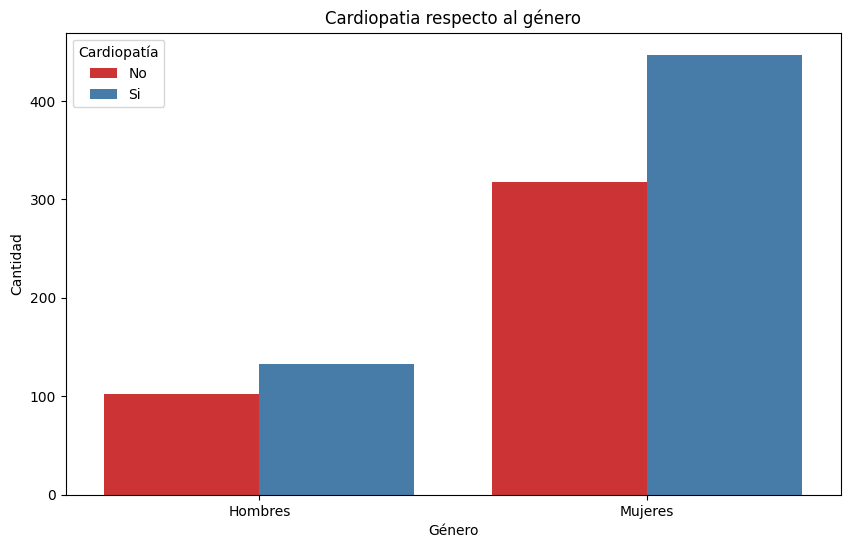

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='target', data=datos, palette='Set1')
plt.title('Cardiopatia respecto al género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.legend(title='Cardiopatía', labels=['No', 'Si'])
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.show()

## Cantidad de pacientes con dolor toráxico

In [ ]:
# Patients reported chest pain
# 0 (angina típica)
# 1 (angina atípica)
# 2 (Sin dolor)
# 3 (Asintomático)
datos['chestpain'].value_counts()

,count
chestpain,
0,420
2,312
1,224
3,44


## Tipo de dolor toráxico y relación con la cardiopatía

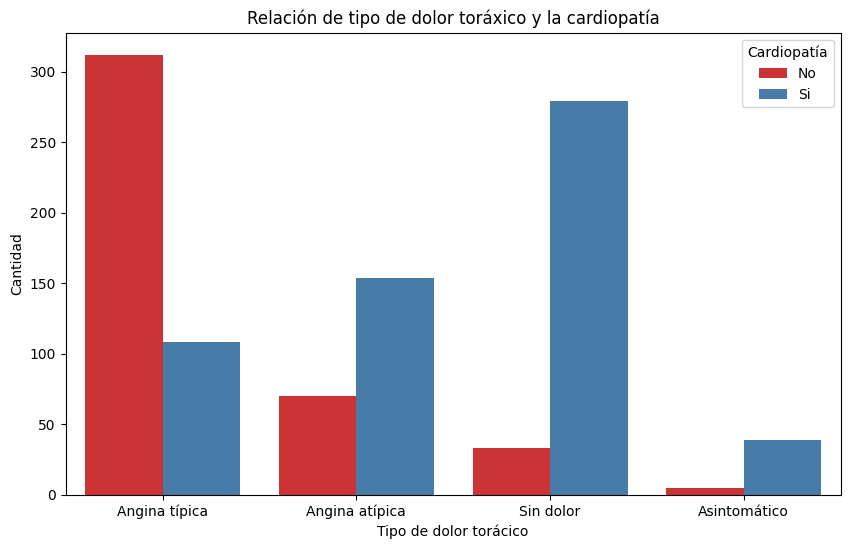

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chestpain', hue='target', data=datos, palette='Set1')
plt.title('Relación de tipo de dolor toráxico y la cardiopatía')
plt.xlabel('Tipo de dolor torácico')
plt.ylabel('Cantidad')
plt.legend(title='Cardiopatía', labels=['No', 'Si'])
plt.xticks([0, 1, 2, 3], ['Angina típica', 'Angina atípica', 'Sin dolor', 'Asintomático'])
plt.show()

/tmp/ipython-input-36-2843644393.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_col.value_counts().index,
/tmp/ipython-input-36-2843644393.py:20: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x=label_col.value_counts().index,
/tmp/ipython-input-36-2843644393.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_col.value_counts().index,
/tmp/ipython-input-36-2843644393.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_col.value_counts().index,
/tmp/

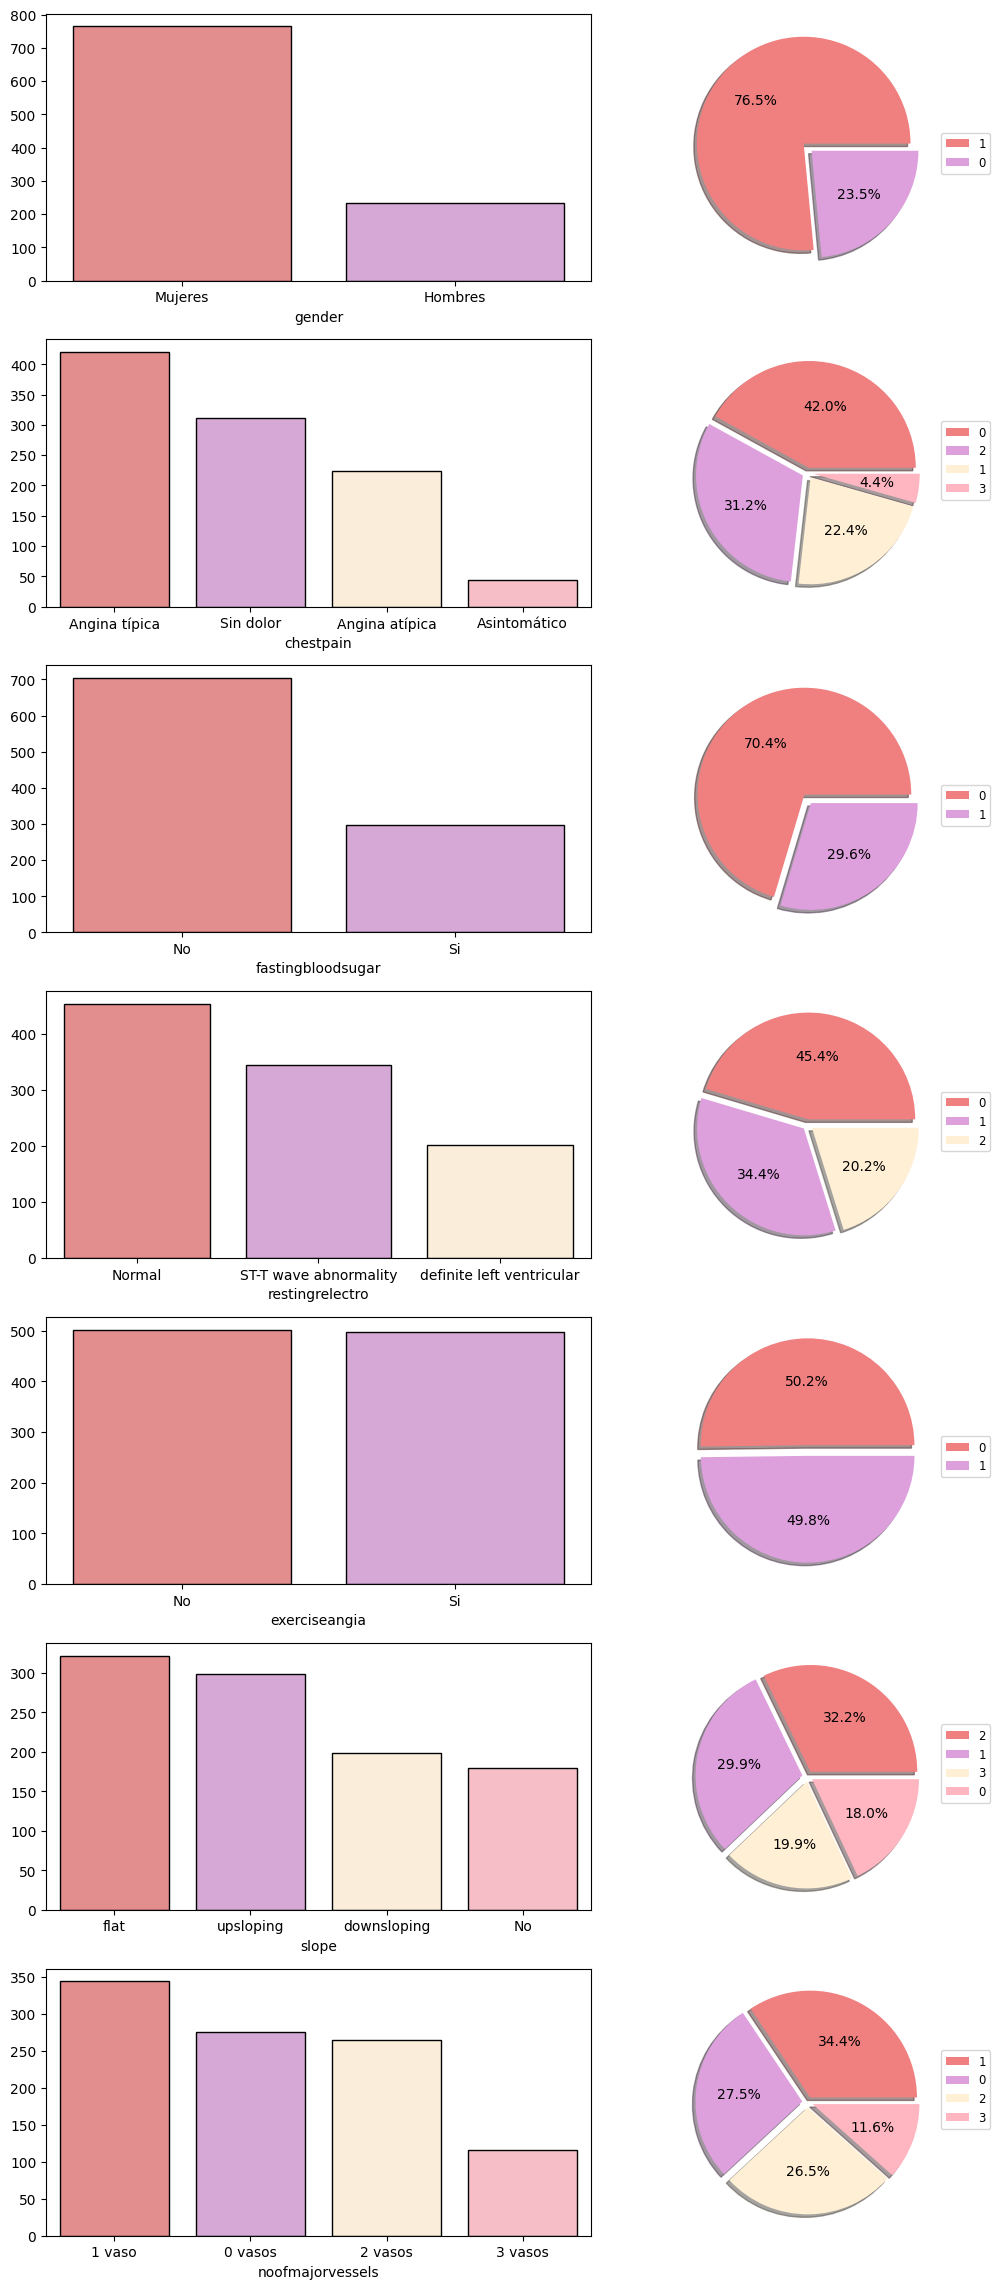

In [ ]:
# Counts and Ratios of Categorical Variables
cat_vars = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
cat_labels = {
              'gender':{0:'Hombres',1:'Mujeres'},
              'chestpain':{0:'Angina típica',1:'Angina atípica',2:'Sin dolor',3:'Asintomático'},
              'fastingbloodsugar':{0:'No',1:'Si'},
              'restingrelectro':{0:'Normal',1:'ST-T wave abnormality',2:'definite left ventricular'},
              'exerciseangia':{0:'No',1:'Si'},
              'slope':{0:'No',1:'upsloping',2:'flat',3:'downsloping'},
              'noofmajorvessels':{0: '0 vasos', 1: '1 vaso', 2: '2 vasos', 3: '3 vasos'}
              }

custom_colors = ['lightcoral', 'plum', 'papayawhip', 'lightpink']

plt.figure(figsize=(11,23))
j = 1
for i in cat_vars:
    label_col = datos[i].replace(cat_labels[i]) if i in cat_labels else datos[i]
    plt.subplot(7,2, j)
    sns.barplot(x=label_col.value_counts().index,
                y=label_col.value_counts(),
                palette=custom_colors,
                edgecolor='black')
    plt.ylabel("")
    plt.subplot(7,2, j+1)
    plt.pie(datos[i].value_counts(),
            explode=0.05 * np.ones(len(datos[i].value_counts())),
            shadow=True,
            autopct='%0.1f%%',
            colors=custom_colors)
    j = j +2
    plt.legend(labels=datos[i].value_counts().index, loc=(1,0.4), fontsize="small")
plt.tight_layout()
plt.show()

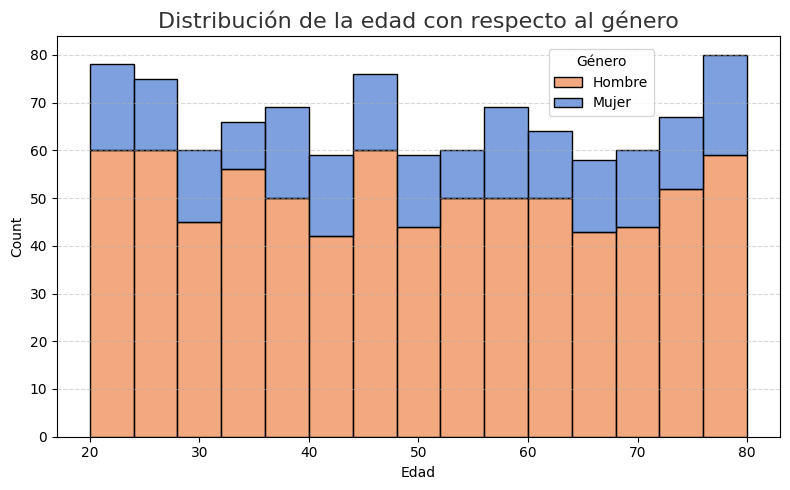

In [ ]:
# Age distribution by gender
plt.figure(figsize=(8, 5))
sns.histplot(x='age', hue='gender', data=datos, palette='muted', multiple='stack', bins=15, alpha=0.7)
plt.title('Distribución de la edad con respecto al género', fontsize=16, alpha=0.8)
plt.xlabel('Edad')
plt.legend(title='Género', labels=['Hombre', 'Mujer'], loc=(0.68,0.8))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-38-113632243.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=datos["target"].value_counts().index, y=datos["target"].value_counts(), palette=cols)


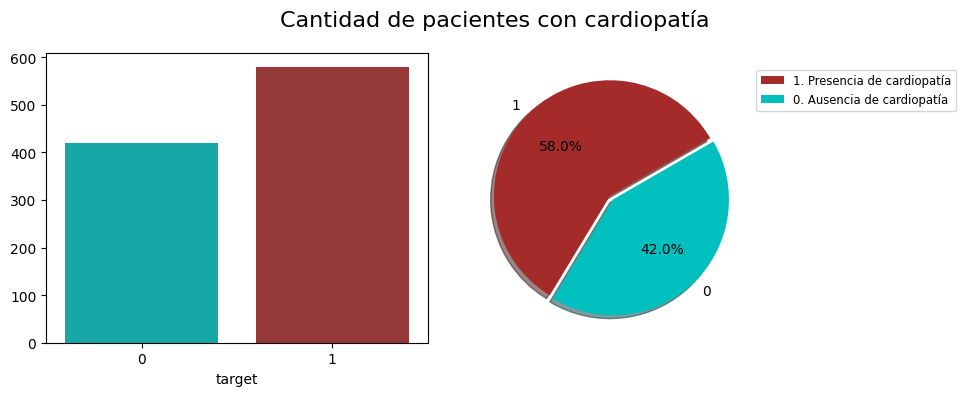

In [ ]:
plt.figure(figsize=(10,4))
cols = ["c", "brown"]
plt.subplot(1,2,1)
sns.barplot(x=datos["target"].value_counts().index, y=datos["target"].value_counts(), palette=cols)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=datos["target"].value_counts(), labels=datos["target"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.1f%%', colors=["brown", "c"])
plt.legend(labels=["1. Presencia de cardiopatía", "0. Ausencia de cardiopatía"], loc=(1,0.8), fontsize="small")
plt.suptitle("Cantidad de pacientes con cardiopatía", fontsize=16)
plt.tight_layout()
plt.show()

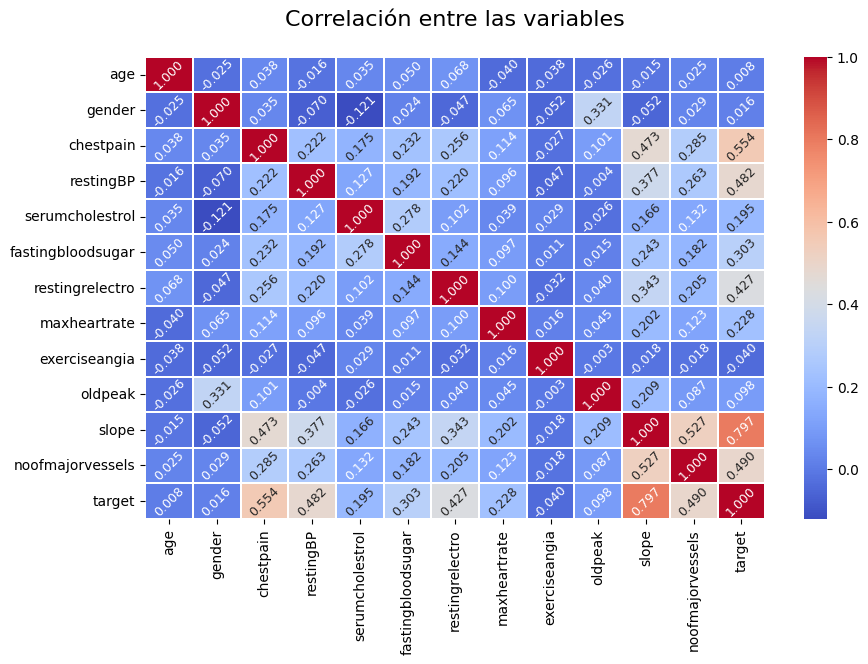

In [ ]:
# Correaltion table
plt.figure(figsize=(10,6))
sns.heatmap(
            datos.drop("patientid", axis=1).corr(),
            linewidths=0.05,
            annot=True,
            annot_kws={"size": 9, "rotation": 45},
            fmt=".3f",
            cmap='coolwarm',
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlación entre las variables\n", fontsize=16)
plt.show()

# Preprocesamiento de los datos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

variables_continuas = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
variables_categoricas = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']

#Noramlización de variables continuas
scaler = StandardScaler()
datos[variables_continuas] = scaler.fit_transform(datos[variables_continuas])

#Las variables categoricas no se normalizarán

In [ ]:
# Separar características y target
X = datos[variables_continuas + variables_categoricas].values
y = datos['target'].values

In [ ]:
# Dividir el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Crear DataLoader para entrenamiento
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

# Crear DataLoader para prueba
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

# Construcción de la Red Neuronal


## Arquitectura de la red nueronal

In [ ]:
# hyper parámetros
import torch.nn as nn


# Construcción de la red neuronal
input_size = 12
hidden_sizes = [32, 16]
output_size = 1

# Construcción de la red neuronal
model = nn.Sequential(
        nn.Linear(input_size, hidden_sizes[0]),
        nn.ReLU(),
        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
        nn.ReLU(),
        nn.Linear(hidden_sizes[1], output_size),
)

print(model)



Sequential(
  (0): Linear(in_features=12, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)


Red neuronal de 4 *capas*

* 1 capa de entrada con 12 neuronas
* 1 capa de salida con 1 neurona
* 2 capas ocultas de, una 32 nueronas y otra de 16 neuronas
* Conectadas todas las neuronas entre si


## Entrenamiento de la red neuronal

Loss=−[y⋅log(p)+(1−y)⋅log(1−p)]

Epoch 1/25 - Train Loss: 0.6507 - Val Loss: 0.6022
Epoch 2/25 - Train Loss: 0.5590 - Val Loss: 0.4662
Epoch 3/25 - Train Loss: 0.4470 - Val Loss: 0.3617
Epoch 4/25 - Train Loss: 0.3441 - Val Loss: 0.2448
Epoch 5/25 - Train Loss: 0.2710 - Val Loss: 0.1994
Epoch 6/25 - Train Loss: 0.2268 - Val Loss: 0.1617
Epoch 7/25 - Train Loss: 0.2005 - Val Loss: 0.1526
Epoch 8/25 - Train Loss: 0.1805 - Val Loss: 0.1478
Epoch 9/25 - Train Loss: 0.1626 - Val Loss: 0.1270
Epoch 10/25 - Train Loss: 0.1519 - Val Loss: 0.1179
Epoch 11/25 - Train Loss: 0.1401 - Val Loss: 0.1254
Epoch 12/25 - Train Loss: 0.1330 - Val Loss: 0.1239
Epoch 13/25 - Train Loss: 0.1276 - Val Loss: 0.0868
Epoch 14/25 - Train Loss: 0.1191 - Val Loss: 0.0861
Epoch 15/25 - Train Loss: 0.1125 - Val Loss: 0.0873
Epoch 16/25 - Train Loss: 0.1091 - Val Loss: 0.0773
Epoch 17/25 - Train Loss: 0.1019 - Val Loss: 0.0748
Epoch 18/25 - Train Loss: 0.0985 - Val Loss: 0.0729
Epoch 19/25 - Train Loss: 0.0940 - Val Loss: 0.0711
Epoch 20/25 - Train L

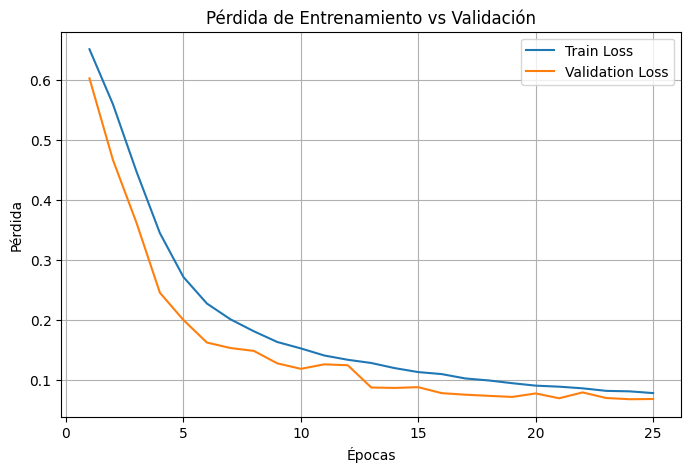

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Definir la función de pérdida
criterion = nn.BCEWithLogitsLoss()

# Definir el optimizador
#optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
optimizer = torch.optim.SGD(model.parameters(), lr=0.008, momentum=0.9)

# Entrenamiento del modelo
epochs = 25
train_losses = [] # Lista para almacenar la pérdida en cada época
val_losses = []  # Para ver si hay overfitting

for epoch in range(epochs):
    model.train()
    running_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader) # Calculate average training loss for the epoch
    train_losses.append(epoch_loss) # Append to the list

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(test_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {epoch_loss:.4f} - Val Loss: {avg_val_loss:.4f}")

# Graficar comparación de pérdidas
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida de Entrenamiento vs Validación')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Cambiar a modo evaluación
model.eval()

# Obtener un batch del DataLoader
inputs, labels = next(iter(test_loader))  # inputs: [batch_size, 12]

# Tomar el primer paciente del batch
paciente = inputs[0, :].unsqueeze(0)  # [1, 12] para mantener dimensión batch
etiqueta_real = labels[0].item()

# Desactivar gradientes
with torch.no_grad():
    salida = model(paciente)  # Logits
    probabilidad = torch.sigmoid(salida)  # Probabilidad (entre 0 y 1)
    prediccion = 1 if probabilidad >= 0.5 else 0

# Mostrar resultados
print(f"Salida del modelo (logit): {salida.item():.4f}")
print(f"Probabilidad de enfermedad: {probabilidad.item():.4f}")
print(f"Predicción del modelo: {prediccion}")
print(f"Etiqueta real del paciente: {int(etiqueta_real)}")

Salida del modelo (logit): 3.7957
Probabilidad de enfermedad: 0.9780
Predicción del modelo: 1
Etiqueta real del paciente: 1


Prueba con datos de entrenamiento


In [ ]:
# Mostrar los primeros 10 resultados
print("\nPrueba con 10 pacientes :")
# Obtener un batch del DataLoader
inputs, labels = next(iter(train_loader))

# Modo evaluación
model.eval()

with torch.no_grad():
    outputs = model(inputs)  # logits
    probabilidades = torch.sigmoid(outputs)  # convertir a probabilidades
    predicciones = (probabilidades >= 0.5).float()  # clase: 0 o 1

for i in range(10):
    real = int(labels[i].item())
    pred = int(predicciones[i].item())
    prob = float(probabilidades[i].item())
    print(f"Paciente {i+1}: Real = {real}, Predicho = {pred}, Probabilidad = {prob:.2f}")


Prueba con 10 pacientes :
Paciente 1: Real = 1, Predicho = 1, Probabilidad = 0.99
Paciente 2: Real = 1, Predicho = 1, Probabilidad = 1.00
Paciente 3: Real = 0, Predicho = 0, Probabilidad = 0.04
Paciente 4: Real = 0, Predicho = 0, Probabilidad = 0.01
Paciente 5: Real = 1, Predicho = 1, Probabilidad = 0.99
Paciente 6: Real = 1, Predicho = 1, Probabilidad = 1.00
Paciente 7: Real = 1, Predicho = 1, Probabilidad = 0.91
Paciente 8: Real = 0, Predicho = 0, Probabilidad = 0.01
Paciente 9: Real = 0, Predicho = 0, Probabilidad = 0.01
Paciente 10: Real = 0, Predicho = 0, Probabilidad = 0.04


Prueba con datos de validación


In [ ]:
# Mostrar los primeros 10 resultados
print("\nPrueba con 10 pacientes :")
# Obtener un batch del DataLoader
inputs, labels = next(iter(test_loader))

# Modo evaluación
model.eval()

with torch.no_grad():
    outputs = model(inputs)  # logits
    probabilidades = torch.sigmoid(outputs)  # convertir a probabilidades
    predicciones = (probabilidades >= 0.5).float()  # clase: 0 o 1

for i in range(10):
    real = int(labels[i].item())
    pred = int(predicciones[i].item())
    prob = float(probabilidades[i].item())
    print(f"Paciente {i+1}: Real = {real}, Predicho = {pred}, Probabilidad = {prob:.2f}")


Prueba con 10 pacientes :
Paciente 1: Real = 0, Predicho = 0, Probabilidad = 0.01
Paciente 2: Real = 0, Predicho = 0, Probabilidad = 0.00
Paciente 3: Real = 0, Predicho = 0, Probabilidad = 0.00
Paciente 4: Real = 0, Predicho = 0, Probabilidad = 0.00
Paciente 5: Real = 1, Predicho = 1, Probabilidad = 0.98
Paciente 6: Real = 1, Predicho = 1, Probabilidad = 0.99
Paciente 7: Real = 1, Predicho = 1, Probabilidad = 0.98
Paciente 8: Real = 0, Predicho = 0, Probabilidad = 0.41
Paciente 9: Real = 0, Predicho = 0, Probabilidad = 0.00
Paciente 10: Real = 1, Predicho = 1, Probabilidad = 1.00


# Métricas de validación

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        preds = (probs >= 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calcular métricas
acc = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds)
rec = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
conf = confusion_matrix(all_labels, all_preds)

print("\n--- Métricas en conjunto de prueba ---")
# Mostrar métricas en una tabla
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [acc, prec, rec, f1]
})

display(metrics_df)


--- Métricas en conjunto de prueba ---


,Metric,Value
0,Accuracy,0.965000
1,Precision,0.982456
2,Recall,0.957265
3,F1-Score,0.969697


* Accuracy (Exactitud): Este valor indica la proporción total de predicciones correctas (tanto positivos verdaderos como negativos verdaderos) sobre el total de casos. Un accuracy alto (en este caso, 0.9700) sugiere que el modelo clasifica correctamente a la gran mayoría de los pacientes, ya sea prediciendo correctamente la presencia o ausencia de enfermedad cardíaca.
* Precision (Precisión): La precisión se enfoca en las predicciones positivas. Indica la proporción de verdaderos positivos (pacientes correctamente identificados con enfermedad cardíaca) sobre el total de predicciones positivas (pacientes que el modelo predijo que tenían la enfermedad). Una alta precisión (0.982609) significa que, cuando el modelo predice que un paciente tiene enfermedad cardíaca, es muy probable que realmente la tenga. Esto es importante para minimizar los falsos positivos, que podrían generar ansiedad innecesaria en los pacientes.
* Recall (Sensibilidad o Exhaustividad): El recall se enfoca en los casos positivos reales. Indica la proporción de verdaderos positivos (pacientes con enfermedad cardíaca que fueron correctamente identificados) sobre el total de casos positivos reales (todos los pacientes que realmente tienen la enfermedad). Un recall alto (0.965812) significa que el modelo es muy bueno identificando a los pacientes que sí tienen la enfermedad. Esto es crucial en el contexto médico para no pasar por alto casos de enfermedad cardíaca.
* F1-Score: El F1-Score es la media armónica de la precisión y el recall. Proporciona un equilibrio entre ambas métricas y es útil cuando hay un desbalance entre las clases (aunque en este dataset no parece haber un desbalance significativo). Un F1-Score alto (0.974138) indica que el modelo tiene un buen rendimiento general, considerando tanto los falsos positivos como los falsos negativos.

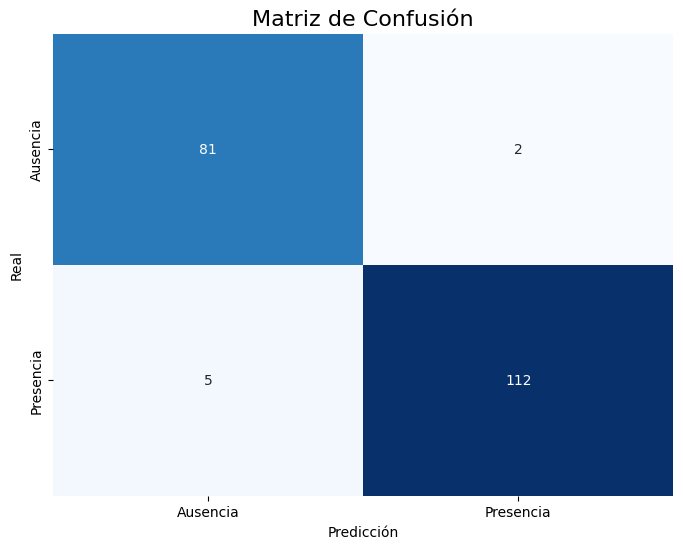

In [ ]:
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.xticks([0.5, 1.5], ['Ausencia', 'Presencia'])
plt.yticks([0.5, 1.5], ['Ausencia', 'Presencia'])
plt.show()

Matriz de Confusión: La matriz de confusión te muestra el detalle de las predicciones:
* Verdaderos Positivos (True Positives - TP): Pacientes con enfermedad cardíaca que el modelo predijo correctamente que la tenían.
* Verdaderos Negativos (True Negatives - TN): Pacientes sin enfermedad cardíaca que el modelo predijo correctamente que no la tenían.
* Falsos Positivos (False Positives - FP): Pacientes sin enfermedad cardíaca que el modelo predijo incorrectamente que la tenían.
* Falsos Negativos (False Negatives - FN): Pacientes con enfermedad cardíaca que el modelo predijo incorrectamente que no la tenían.